In [1]:
# Install necessary packages
install.packages("ggplot2")   # For visualization
install.packages("cluster")   # For clustering methods
install.packages("factoextra") # For PCA


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pbkrtest’, ‘car’, ‘DT’, ‘rstatix’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’




Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] "Confusion Matrix:"
       Cluster
Species   1   2   3
      1  35   0 117
      2  15   0  53
      3  62  61   1
[1] "Clustering Accuracy: 0.1"


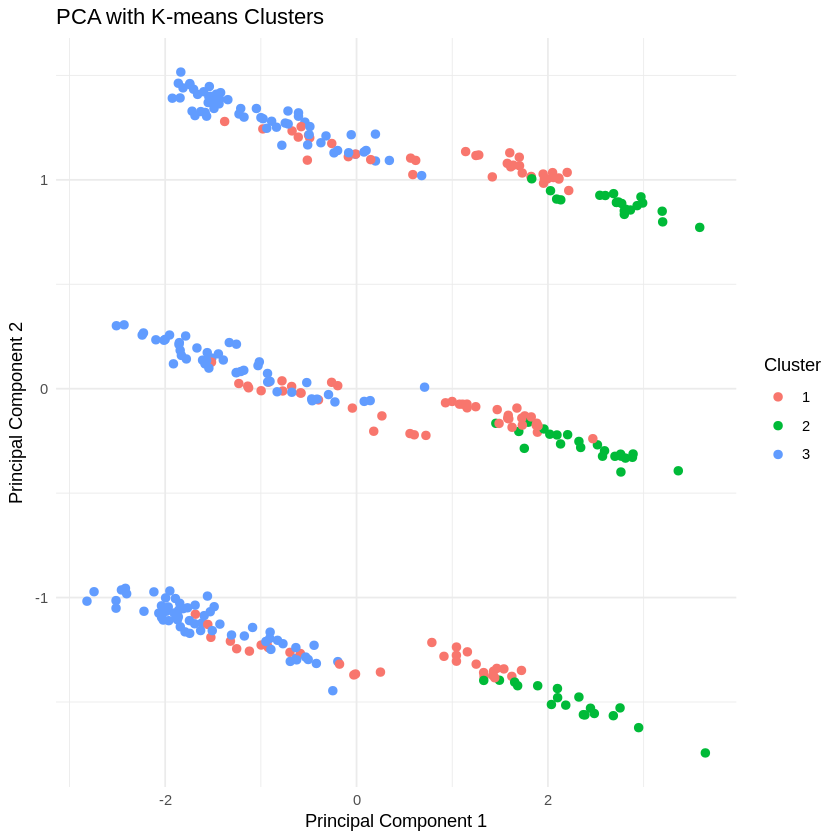

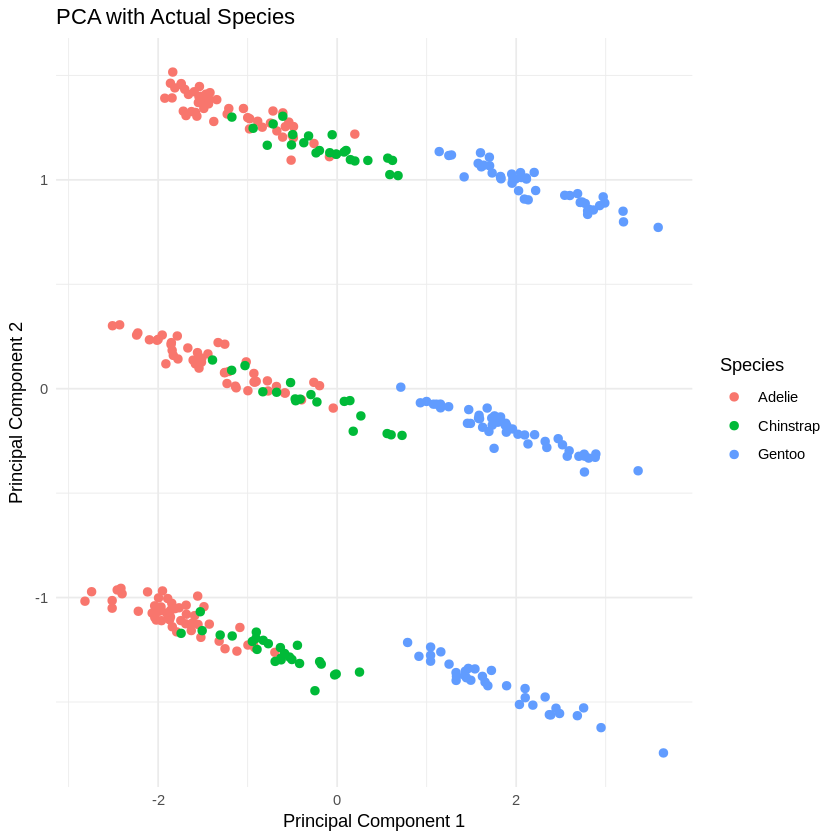

In [2]:
# Load necessary libraries
library(ggplot2)
library(cluster)
library(factoextra)
library(dplyr)

# Load the penguins dataset
penguins_data <- read.csv("cleaned_penguins.csv")

# Remove any non-numeric columns for clustering (e.g., species, island, etc.)
# Assuming the species column is the target variable for evaluation.
penguins_numeric <- penguins_data %>% select_if(is.numeric)

# Remove rows with missing values
penguins_numeric <- na.omit(penguins_numeric)

# Perform K-means clustering
set.seed(123)  # For reproducibility
k <- 3  # Assuming there are 3 species
kmeans_result <- kmeans(penguins_numeric, centers = k, nstart = 25)

# Add cluster assignments to the original data
penguins_data$Cluster <- as.factor(kmeans_result$cluster)

# Visualize clusters using PCA
pca_result <- prcomp(penguins_numeric, scale. = TRUE)
pca_data <- as.data.frame(pca_result$x)

# Add cluster and species (if available) to PCA data for visualization
pca_data$Cluster <- penguins_data$Cluster
if ("species" %in% colnames(penguins_data)) {
  pca_data$Species <- penguins_data$species
}

# Plot the PCA results with clusters
p1 <- ggplot(pca_data, aes(x = PC1, y = PC2, color = Cluster)) +
  geom_point(size = 2) +
  labs(title = "PCA with K-means Clusters", x = "Principal Component 1", y = "Principal Component 2") +
  theme_minimal()

# Optional: Plot actual species if available
if ("species" %in% colnames(penguins_data)) {
  p2 <- ggplot(pca_data, aes(x = PC1, y = PC2, color = Species)) +
    geom_point(size = 2) +
    labs(title = "PCA with Actual Species", x = "Principal Component 1", y = "Principal Component 2") +
    theme_minimal()
}

# Evaluate the clustering accuracy if the species column exists
if ("species" %in% colnames(penguins_data)) {
  species_labels <- as.numeric(factor(penguins_data$species))
  cluster_labels <- kmeans_result$cluster
  confusion_matrix <- table(Species = species_labels, Cluster = cluster_labels)

  # Print the confusion matrix
  print("Confusion Matrix:")
  print(confusion_matrix)

  # Calculate accuracy
  accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
  print(paste("Clustering Accuracy:", round(accuracy, 2)))
}

# Display plots
print(p1)
if (exists("p2")) print(p2)
